### Experiment 6
1. Hebbian Learning (Unsupervised)
2. Perceptron Learning (Supervised)
3. Delta Learning (Supervised)

In [341]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from prettytable import PrettyTable
% matplotlib inline
sp.init_printing()

In [342]:
def sign(x):
    return np.sign(x)

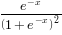

In [343]:
# finding the derivative of the sigmoid function
x = sp.Symbol('x')
sp.diff(1 / (1 + sp.exp(-x)))

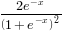

In [344]:
# finding the derivative of the bipolar continous function
sp.diff(2 / (1 + sp.exp(-x)) - 1)

In [345]:
def sigmoid(x, prime = False):
    if prime:
        return np.exp(-x) * np.power(sigmoid(x), 2)
    
    return 1 / (1 + np.exp(-x))

In [346]:
def bipolarc(x, prime = False):
    if prime:
        return 2 * np.exp(-x) * np.power(sigmoid(x), 2)
    
    return (2 / (1 + np.exp(-x))) - 1

In [347]:
x = np.arange(-6, 6, 0.01)
x

array([-6.  , -5.99, -5.98, ...,  5.97,  5.98,  5.99])

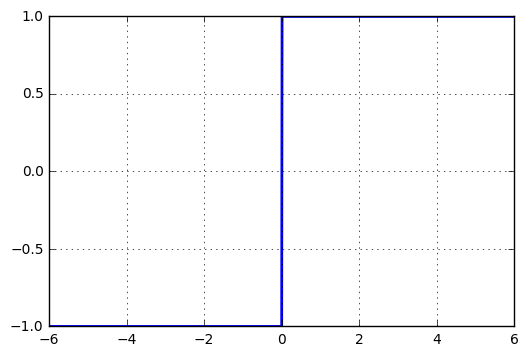

In [348]:
plt.plot(x, sign(x), lw = 2)
plt.grid()

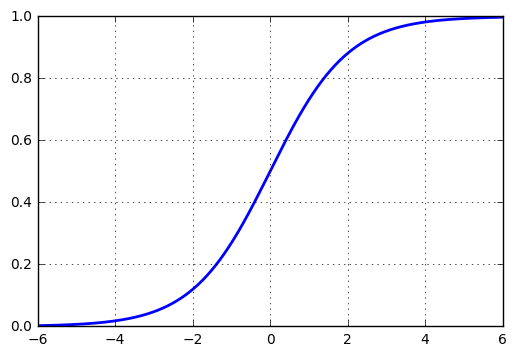

In [349]:
plt.plot(x, sigmoid(x), lw = 2)
plt.grid()

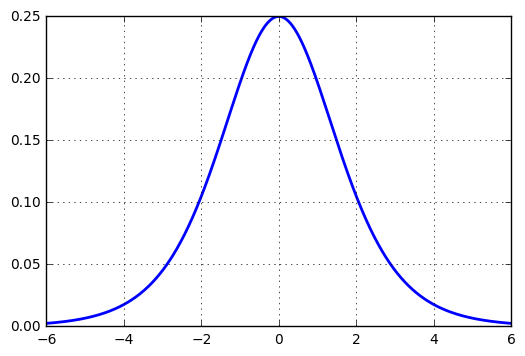

In [350]:
plt.plot(x, sigmoid(x, prime = True), lw = 2)
plt.grid()

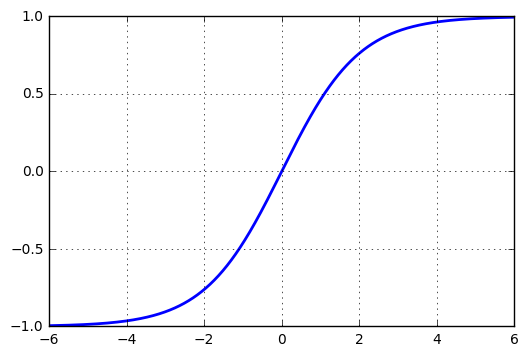

In [351]:
plt.plot(x, bipolarc(x), lw = 2)
plt.grid()

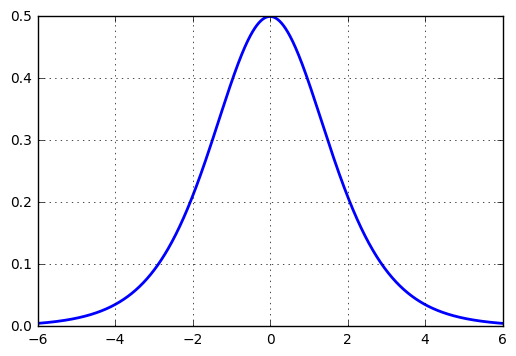

In [352]:
plt.plot(x, bipolarc(x, prime = True), lw = 2)
plt.grid()

In [353]:
class Model:
    SIGN     = sign
    SIGMOID  = sigmoid
    BIPOLARC = bipolarc

In [354]:
class Hebbian(Model):
    def get_weight(self, features, winit, activation_function = Model.SIGN, learning_rate = 1):
        weights    = [ ]
        weights.append(winit)
        
        self.table = PrettyTable(['ITERATION', 'net', 'f(net)', 'delta', 'WEIGHT', 'NEW WEIGHT'])
            
        for i in range(len(features)):
            z = np.dot(np.transpose(weights[i]), features[i])
            a = activation_function(z)
            d = np.multiply(learning_rate * a, features[i])
            
            weights.append(np.add(weights[i], d))
            
            self.table.add_row([i + 1,
                                np.around(z, decimals = 4),
                                np.around(a, decimals = 4),
                                np.around(d, decimals = 4),
                                np.around(weights[i], decimals = 4),
                                np.around(weights[i + 1], decimals = 4)])
        
        return weights[-1]

In [355]:
features = [[1, -2, 1.5, 0], [1, -0.5, -2, -1.5], [0, 1, -1, 1.5]]

In [356]:
hebbian = Hebbian()

epochs  = 5
weight  = [1, -1, 0, 0.5]
for i in range(epochs):
    print("EPOCH " + str(i + 1))
    weight = hebbian.get_weight(features, weight)
    print(hebbian.table)

EPOCH 1
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
| ITERATION |  net  | f(net) |         delta         |         WEIGHT        |       NEW WEIGHT      |
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
|     1     |  3.0  |  1.0   | [ 1.  -2.   1.5  0. ] | [ 1.  -1.   0.   0.5] | [ 2.  -3.   1.5  0.5] |
|     2     | -0.25 |  -1.0  | [-1.   0.5  2.   1.5] | [ 2.  -3.   1.5  0.5] | [ 1.  -2.5  3.5  2. ] |
|     3     |  -3.0 |  -1.0  | [-0.  -1.   1.  -1.5] | [ 1.  -2.5  3.5  2. ] | [ 1.  -3.5  4.5  0.5] |
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
EPOCH 2
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
| ITERATION |  net  | f(net) |         delta         |         WEIGHT        |       NEW WEIGHT      |
+-----------+-------+--------+-----------------------+---

In [357]:
features = [[1, -2, 0, -1], [0, 1.5, -0.5, -1], [-1, 1, 0.5, -1]]
labels   = [[-1], [1], [1]]

In [358]:
class Perceptron(Model):
    SIGN = sign
    
    def get_weight(self, features, labels, winit, activation_function = SIGN, learning_rate = 0.1):
        weights    = [ ]
        weights.append(winit)
        
        self.table = PrettyTable(['ITERATION', 'net', 'f(net)', 'delta', 'WEIGHT', 'NEW WEIGHT'])
            
        for i in range(len(features)):
            z = np.dot(np.transpose(weights[i]), features[i])
            a = activation_function(z)
            d = learning_rate * (labels[i] - a) * features[i]
            
            weights.append(weights[i] + d)
            
            self.table.add_row([i + 1,
                                np.around(z, decimals = 4),
                                np.around(a, decimals = 4),
                                np.around(d, decimals = 4),
                                np.around(weights[i], decimals = 4),
                                np.around(weights[i + 1], decimals = 4)])
            
        return weights[-1]

In [359]:
perceptron = Perceptron()

In [360]:
epochs  = 7
weight  = [1, -1, 0, 0.5]
for i in range(epochs):
    print("EPOCH " + str(i + 1))
    weight = perceptron.get_weight(features, labels, weight)
    print(perceptron.table)

EPOCH 1
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
| ITERATION |  net  | f(net) |         delta         |         WEIGHT        |       NEW WEIGHT      |
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
|     1     |  2.5  |  1.0   | [-0.2  0.4 -0.   0.2] | [ 1.  -1.   0.   0.5] | [ 0.8 -0.6  0.   0.7] |
|     2     |  -1.6 |  -1.0  | [ 0.   0.3 -0.1 -0.2] | [ 0.8 -0.6  0.   0.7] | [ 0.8 -0.3 -0.1  0.5] |
|     3     | -1.65 |  -1.0  | [-0.2  0.2  0.1 -0.2] | [ 0.8 -0.3 -0.1  0.5] | [ 0.6 -0.1  0.   0.3] |
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
EPOCH 2
+-----------+-------+--------+-----------------------+-----------------------+-----------------------+
| ITERATION |  net  | f(net) |         delta         |         WEIGHT        |       NEW WEIGHT      |
+-----------+-------+--------+-----------------------+---

In [361]:
class Delta(Model):
    def get_weight(self, features, labels, winit, activation_function = Model.SIGMOID, learning_rate = 0.1):
        weights    = [ ]
        weights.append(winit)
        
        self.table = PrettyTable(['ITERATION', 'net', 'f(net)', 'delta', 'WEIGHT', 'NEW WEIGHT'])
            
        for i in range(len(features)):
            z = np.dot(np.transpose(weights[i]), features[i])
            a = activation_function(z)
            # learning rule changes
            d = learning_rate * (labels[i] - a) * features[i] * activation_function(z, prime = True)
            
            weights.append(weights[i] + d)
            
            self.table.add_row([i + 1,
                                np.around(z, decimals = 2),
                                np.around(a, decimals = 2),
                                np.around(d, decimals = 2),
                                np.around(weights[i], decimals = 2),
                                np.around(weights[i + 1], decimals = 2)])
            
        return weights[-1]

In [362]:
delta   = Delta()
epochs  = 10
weight  = [1, -1, 0, 0.5]

In [363]:
for i in range(epochs):
    print("EPOCH " + str(i + 1))
    weight = delta.get_weight(features, labels, weight)
    print(delta.table)

EPOCH 1
+-----------+-------+--------+---------------------------+---------------------------+---------------------------+
| ITERATION |  net  | f(net) |           delta           |           WEIGHT          |         NEW WEIGHT        |
+-----------+-------+--------+---------------------------+---------------------------+---------------------------+
|     1     |  2.5  |  0.92  | [-0.01  0.03 -0.    0.01] |   [ 1.  -1.   0.   0.5]   | [ 0.99 -0.97  0.    0.51] |
|     2     | -1.97 |  0.12  | [ 0.    0.01 -0.   -0.01] | [ 0.99 -0.97  0.    0.51] | [ 0.99 -0.96 -0.    0.5 ] |
|     3     | -2.45 |  0.08  | [-0.01  0.01  0.   -0.01] | [ 0.99 -0.96 -0.    0.5 ] | [ 0.98 -0.95 -0.    0.5 ] |
+-----------+-------+--------+---------------------------+---------------------------+---------------------------+
EPOCH 2
+-----------+-------+--------+---------------------------+---------------------------+---------------------------+
| ITERATION |  net  | f(net) |           delta           |      